In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def read_graph_data(filename):
    df = pd.read_csv(filename, sep='\t')
    return df['origem'].to_numpy(), df['destino'].to_numpy(), df['custo'].to_numpy()

In [3]:
base = "C"
    
graph_data = []
initial_vertex, end_vertex = 0, 0

if base == "A":
    graph_data = read_graph_data('grafo1.csv')
    initial_vertex = 1
    end_vertex = 12
    base_name = "Graph B - 12 vertices and 25 edges"

elif base == "B":
    graph_data = read_graph_data('grafo2.csv')
    initial_vertex = 1
    end_vertex = 20
    base_name = "Graph C - 20 vertices and 190 edges"

elif base == "C":
    graph_data = read_graph_data('grafo3.csv')
    initial_vertex = 1
    end_vertex = 100
    base_name = "Graph D - 100 vertices and 8020 edges"


In [4]:
# Configs iniciais
NUM_EXP = 30
NUM_ANTS = 190
NUM_ITERATIONS = 80
INITIAL_PHEROMONE = 0.0001

RHO = 0.6
ALPHA = 0.7
BETA = 1
EXPLORATION = NUM_ANTS * 0.6

In [5]:
sources, destinations, costs, initial_vertex, end_vertex = graph_data[0], graph_data[1], graph_data[2], initial_vertex, end_vertex

path_exp = []
cost_exp = []
time_exp = []

for _ in range(NUM_EXP):
    
    pheromones = np.full(len(sources), INITIAL_PHEROMONE, dtype=np.float64)
    value_exploration = 0.1
    
    best_paths = []
    best_path = []
    best_path_costs = []
    best_path_cost = 0
    
    start_time = time.time()
    for it in range(NUM_ITERATIONS):
       
        distance_paths, index_paths = [], []
        ant = 0
        while ant < NUM_ANTS:
            completed_path, invalid_path = False, False
            current_vertex = initial_vertex
    
            ant_path, ant_path_index = [], []
            ant_path_cost = 0
    
            while not completed_path:
                ant_path.append(current_vertex)
    
                vertex_indices = np.where(sources == current_vertex)[0].tolist()
                unvisited_vertices = [index for index in vertex_indices if destinations[index] not in ant_path]
                vertex_indices = unvisited_vertices
    
                if len(vertex_indices) == 0:
                    ant -= 1
                    completed_path = True
                    invalid_path = True
                else:
                    probabilities = (pheromones[vertex_indices] ** ALPHA) * (costs[vertex_indices] ** (BETA + value_exploration))
                    probabilities /= sum(probabilities)
    
                    next_vertex_index = np.random.choice(vertex_indices, p=probabilities)
    
                    ant_path_cost += costs[next_vertex_index]
                    ant_path_index.append(next_vertex_index)
    
                    current_vertex = destinations[next_vertex_index]
                    if current_vertex == end_vertex:
                        completed_path = True
                        ant_path.append(current_vertex)
    
            if not invalid_path:
                if ant_path_cost > best_path_cost:
                    best_path_cost = ant_path_cost
                    best_path = ant_path
    
                distance_paths.append(ant_path_cost)
                index_paths.append(ant_path_index)
    
            ant += 1
    
        pheromones *= (1 - RHO)
    
        for i, index_path in enumerate(index_paths):
            sum_phe = pheromones[index_path] + distance_paths[i]/1000
    
            pheromones[index_path] = sum_phe
    
            equal_path_count = index_paths.count(index_path)
    
            if equal_path_count >= EXPLORATION:
                value_exploration = min(value_exploration * 2, 15)
    
    
        
        best_paths.append(best_path)
        best_path_costs.append(best_path_cost)   
        
    end_time = time.time()

    path_exp.append(best_paths)
    cost_exp.append(best_path_costs)
    time_exp.append([end_time - start_time])
    

In [11]:
np.mean(cost_exp, axis=0)

array([133.8       , 139.53333333, 142.86666667, 145.03333333,
       147.26666667, 148.53333333, 150.43333333, 151.26666667,
       153.43333333, 154.63333333, 154.63333333, 155.06666667,
       155.23333333, 156.16666667, 156.4       , 156.4       ,
       156.4       , 156.4       , 156.76666667, 157.03333333,
       157.76666667, 158.13333333, 158.13333333, 158.53333333,
       159.        , 159.3       , 159.56666667, 159.7       ,
       160.1       , 160.5       , 160.73333333, 161.06666667,
       161.33333333, 161.33333333, 161.4       , 161.66666667,
       161.96666667, 162.1       , 162.1       , 162.53333333,
       162.53333333, 162.53333333, 162.53333333, 162.56666667,
       162.73333333, 162.73333333, 162.73333333, 162.86666667,
       163.        , 163.03333333, 163.53333333, 163.53333333,
       163.53333333, 163.6       , 163.6       , 163.6       ,
       163.6       , 163.63333333, 163.63333333, 163.7       ,
       163.93333333, 163.93333333, 164.03333333, 164.33

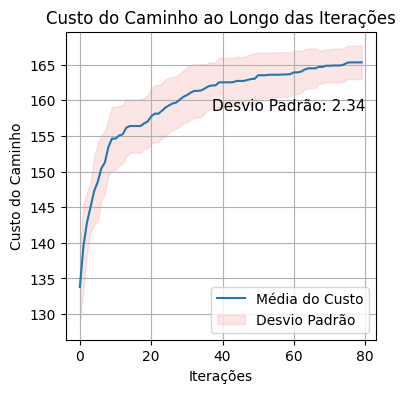

In [37]:
largura_figura = 4
altura_figura = 4  

plt.figure(figsize=(largura_figura, altura_figura))

mean_cost = np.mean(cost_exp, axis=0)
std_dev = np.std(cost_exp, axis=0)  # Calcula o desvio padrão

plt.plot(mean_cost, label='Média do Custo')
plt.fill_between(range(len(mean_cost)), mean_cost - std_dev, mean_cost + std_dev, color='lightcoral', alpha=0.2, label='Desvio Padrão')
plt.xlabel('Iterações')
plt.ylabel('Custo do Caminho')
plt.title('Custo do Caminho ao Longo das Iterações')
plt.legend()
plt.grid(True)

plt.text(len(mean_cost), np.max(mean_cost) - 5, f'Desvio Padrão: {std_dev[-1]:.2f}', fontsize=11, verticalalignment='top', horizontalalignment='right')
plt.show()

plt.show()

In [31]:
max1 = []
for i, cost in enumerate(cost_exp):
    if 168 in cost:
        max1.append(i)

if max1:
    max_index = max(max1)
    print(f"O índice onde o custo atingiu 168 é {max_index}")

O índice onde o custo atingiu 168 é 27


In [34]:
path_exp[27][-1]

[1, 19, 15, 2, 10, 11, 4, 7, 13, 9, 8, 12, 17, 18, 16, 6, 5, 3, 14, 20]

In [10]:
print(np.mean(time_exp))
print(np.std(time_exp))



15.223593068122863
1.9948965789441693
14.684494256973267
